# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
#Your code here 
import json

In [4]:
f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [5]:
#Your code here
type(data)

dict

In [6]:
data.keys()

dict_keys(['meta', 'data'])

In [7]:
type(data['meta'])

dict

In [8]:
data['meta'].keys()

dict_keys(['view'])

In [9]:
type(data['data'])

list

In [10]:
len(data['data'])

60266

In [11]:
type(data['data'][0])

list

In [12]:
len(data['data'][0])

42

In [18]:
data['data'][0][8]

'2016'

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [19]:
#Your code here
import pandas as pd

In [24]:
df = pd.DataFrame(data['data'])
print(df.shape)
df.columns = [item['name'] for item in data['meta']['view']['columns']]
print(df.columns)
df.head()

(60266, 42)
Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [26]:
df[df.Topic == 'Asthma'].Question.value_counts(normalize=True).cumsum()[:10]

Current asthma prevalence among adults aged >= 18 years                                    0.186096
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       0.372193
Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       0.558289
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    0.744385
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    0.930481
Asthma prevalence among women aged 18-44 years                                             1.000000
Name: Question, dtype: float64

In [27]:
cols = ['LocationAbbr', 'LocationDesc', 'DataSource','Topic', 'Question', 'YearStart', 'YearEnd', 'DataValue']
view = df[df.Question == 'Current asthma prevalence among adults aged >= 18 years'][cols]
view.head()

,LocationAbbr,LocationDesc,DataSource,Topic,Question,YearStart,YearEnd,DataValue
4725,IL,Illinois,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.5
5529,IN,Indiana,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.7
5632,IA,Iowa,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,5.6
6777,KS,Kansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.1
7034,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,6.9


In [28]:
view.sort_values(by='LocationAbbr').head()

,LocationAbbr,LocationDesc,DataSource,Topic,Question,YearStart,YearEnd,DataValue
9797,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None
10013,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,10.3
9427,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,9
9959,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None
9905,AK,Alaska,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,2016,2016,None


In [29]:
df.StratificationCategoryID1.value_counts(normalize=True)

RACE       0.631534
GENDER     0.231673
OVERALL    0.136794
Name: StratificationCategoryID1, dtype: float64

In [30]:
view = df[(df.Question == 'Current asthma prevalence among adults aged >= 18 years')
         & (df.StratificationCategoryID1 == 'OVERALL')]
view = view.sort_values(by='LocationAbbr')
print(view.shape)
view.head()

(110, 42)


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9372,9370,5D6EDDA9-B241-4498-A262-ED20AB78C44C,9370,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9427,9425,332B0889-ED65-4080-9373-D92FE918CD1D,9425,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,AGEADJPREV,OVERALL,OVR,None,None,None,None
9426,9424,CD846EC4-617B-4D38-B287-88DCF9BA8751,9424,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,AGEADJPREV,OVERALL,OVR,None,None,None,None
9371,9369,6BEC61D0-E04B-44BA-8170-F7D6A4C40A09,9369,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9374,9372,68F151CE-3084-402C-B672-78A43FBDE287,9372,1527194523,959778,1527194523,959778,None,2016,2016,...,05,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


In [31]:
view.DataValueTypeID.value_counts()

AGEADJPREV    55
CRDPREV       55
Name: DataValueTypeID, dtype: int64

In [32]:
view = df[(df.Question == 'Current asthma prevalence among adults aged >= 18 years')
         & (df.StratificationCategoryID1 == 'OVERALL')
         & (df.DataValueTypeID == 'CRDPREV')]
view = view.sort_values(by='LocationAbbr')
print(view.shape)
view.head()

(55, 42)


,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9372,9370,5D6EDDA9-B241-4498-A262-ED20AB78C44C,9370,1527194523,959778,1527194523,959778,None,2016,2016,...,02,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9371,9369,6BEC61D0-E04B-44BA-8170-F7D6A4C40A09,9369,1527194523,959778,1527194523,959778,None,2016,2016,...,01,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9374,9372,68F151CE-3084-402C-B672-78A43FBDE287,9372,1527194523,959778,1527194523,959778,None,2016,2016,...,05,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9373,9371,5FCE0D49-11FD-4545-B9E7-14F503123105,9371,1527194523,959778,1527194523,959778,None,2016,2016,...,04,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9375,9373,D3F00ED2-A069-4E40-B42B-5A2528A91B6F,9373,1527194523,959778,1527194523,959778,None,2016,2016,...,06,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

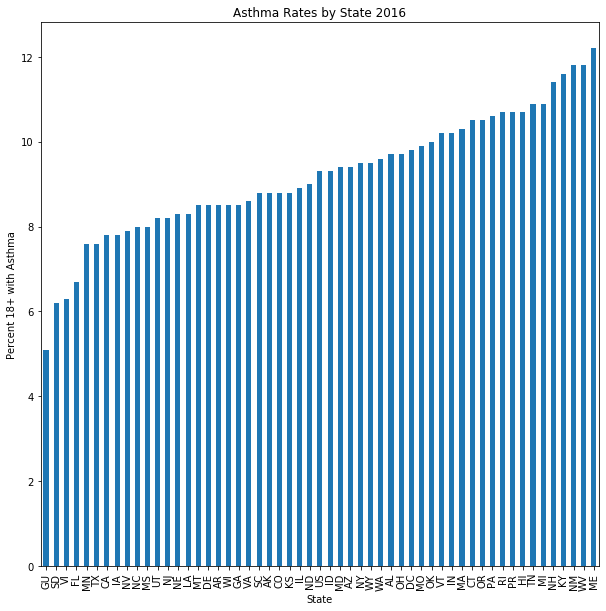

In [35]:
view.DataValue = view.DataValue.astype(float)
view = view.sort_values(by='DataValue')
view.set_index('LocationAbbr')['DataValue'].plot(kind='bar', figsize=(10,10))
plt.title('Asthma Rates by State 2016')
plt.ylabel('Percent 18+ with Asthma')
plt.xlabel('State');

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!